In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
from sqlalchemy import create_engine, inspect
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:

latestDate= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latestDate.date

'2017-08-23'

In [9]:
# Find the most recent date in the data set.


('2017-08-23')

In [64]:
Date = dt.datetime.strptime(latestDate.date, '%Y-%m-%d')
YearAgo = dt.date(Date.year -1, Date.month, Date.day)

data = [Measurement.date,Measurement.prcp]
results = session.query(*data).filter(Measurement.date >= YearAgo).all()

precipitation = pd.DataFrame(results, columns=['Date','Precipitation'])
# drop na values 
precipitation = precipitation.dropna(how='any') 
precipitation = precipitation.sort_values(["Date"], ascending=True)
#precipitation = precipitation.set_index("Date")
precipitation.head()


,Date,Precipitation
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15


<function matplotlib.pyplot.show(close=None, block=None)>

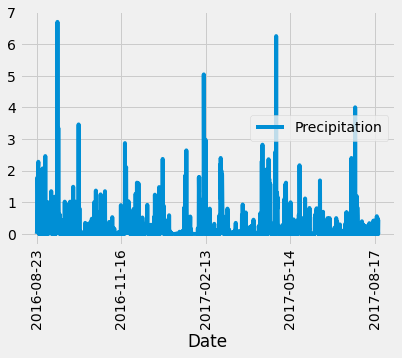

In [65]:
precipitation.plot(x="Date", y="Precipitation", rot=90)
plt.show


Text(0, 0.5, 'Inches')

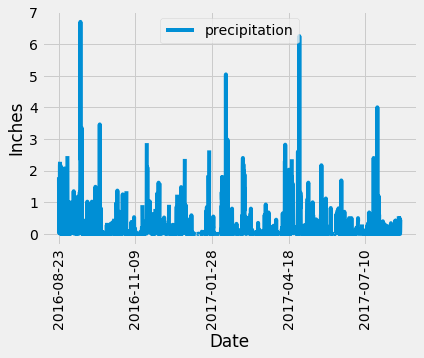

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [20]:
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [57]:
session.query(Station.id).count()

9

In [12]:
# Design a query to calculate the total number stations in the dataset


[(9)]

In [59]:
data = [Measurement.station,func.count(Measurement.id)]
activeStation = session.query(*data).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
activeStation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
tempData = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
stationData = session.query(*tempData).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
stationData

(54.0, 85.0, 71.66378066378067)

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

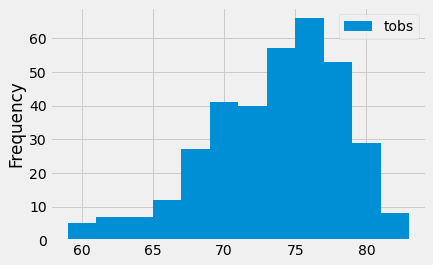

In [81]:
result = session.query(Measurement.tobs).filter(Measurement.station == activeStation[0][0]).\
    filter(Measurement.date >= YearAgo).all()
temperatures = list(np.ravel(result))

Data2 = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*Data2).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.grid(True)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0.5, -1.340000000000014, 'Temperature')

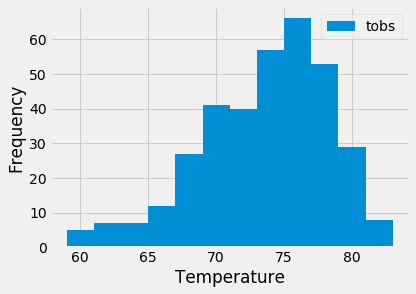

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
session.close()